In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
import os
os.listdir('/content/drive/My Drive/DataSet')

['.ipynb_checkpoints',
 'Untitled.ipynb',
 'Test.csv',
 'Train.csv',
 'Sample_submission.csv',
 'musk_csv.csv']

In [186]:
data = pd.read_csv("/content/drive/My Drive/DataSet/musk_csv.csv")
print(data.columns)

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)


In [187]:
data.isna().any()

ID                   False
molecule_name        False
conformation_name    False
f1                   False
f2                   False
                     ...  
f163                 False
f164                 False
f165                 False
f166                 False
class                False
Length: 170, dtype: bool

In [0]:
z=len(data['class'])
c1=0
c2=0
for i in range(z):
    if data['class'][i]==1:
        c1+=1
    else:
        c2+=1

In [189]:
print("Total 0:",c1)
print("Total 1:",c2)

Total 0: 1017
Total 1: 5581


In [190]:
total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

Number of Rows: 6598
Number of Columns: 170


In [0]:
features = data.iloc[:,4:-1]  #independent columns
labels =   data.iloc[:,-1] 

In [192]:
features_imp = data.iloc[:,10:20]  #independent column 
total_rows=len(features_imp.axes[0])
total_cols=len(features_imp.axes[1])

print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
horizontal_stack = pd.concat([features_imp, labels], axis=1)
print(horizontal_stack.columns)

Number of Rows: 6598
Number of Columns: 10
Index(['f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17',
       'class'],
      dtype='object')


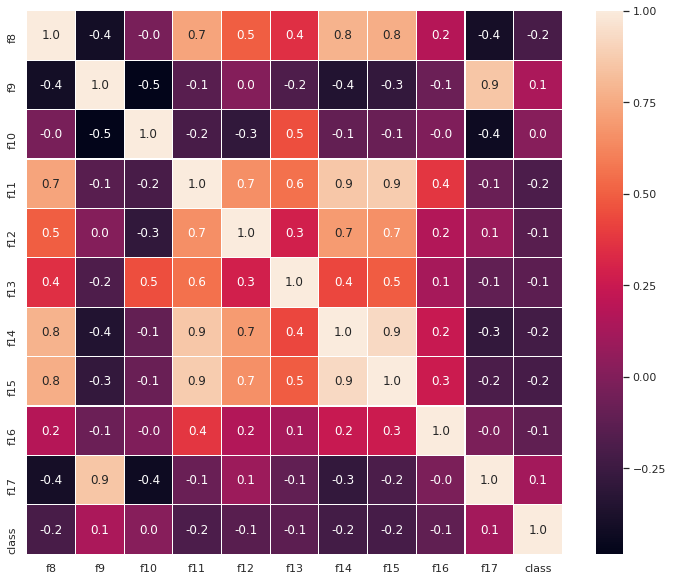

In [16]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(horizontal_stack.corr(),annot=True, linewidths=.1, fmt='.1f', ax=ax)
plt.show()

In [0]:
# Create correlation matrix
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than or eaual to 0.7
to_drop = [column for column in upper.columns if any(upper[column] >= 0.7)]

# Drop features 
features.drop(to_drop, axis=1, inplace=True)

In [194]:
print(features.columns)

Index(['f2', 'f3', 'f4', 'f5', 'f6', 'f8', 'f10', 'f12', 'f13', 'f16', 'f18',
       'f20', 'f21', 'f24', 'f27', 'f28', 'f29', 'f31', 'f32', 'f33', 'f36',
       'f37', 'f38', 'f42', 'f47', 'f55', 'f63', 'f67', 'f68', 'f69', 'f76',
       'f84', 'f88', 'f92', 'f94', 'f95', 'f96', 'f107', 'f116', 'f124',
       'f126', 'f132', 'f138', 'f145', 'f146', 'f147', 'f157', 'f158', 'f160',
       'f161', 'f163', 'f164', 'f165', 'f166'],
      dtype='object')


In [195]:
print(len(features.axes[0]))
print(len(features.axes[1]))

6598
54


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


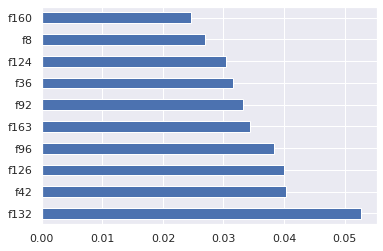

In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(features,labels)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 10, step=1)
selector = selector.fit(features_imp,labels)
print(selector.support_) 
print(selector.ranking_)

In [0]:
from sklearn.preprocessing import scale

In [0]:
X_train, y_test, X_labels, y_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.20,
                                                          random_state=42)
X_train=scale(X_train)
y_test=scale(y_test)


In [198]:
X_train.shape[0]

5278

In [246]:
from keras.models import Sequential
from keras.layers import Dense
import keras
model = Sequential()
model.add(Dense(12, input_dim=54, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
callback_early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 12)                660       
_________________________________________________________________
dense_100 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 9         
Total params: 773
Trainable params: 773
Non-trainable params: 0
_________________________________________________________________
None


Train on 4750 samples, validate on 528 samples
Epoch 1/150
4750/4750 [==============================] - 13s 3ms/step - loss: 0.2736 - acc: 0.8836 - val_loss: 0.2115 - val_acc: 0.9186
Epoch 2/150
4750/4750 [==============================] - 5s 1ms/step - loss: 0.1765 - acc: 0.9297 - val_loss: 0.1775 - val_acc: 0.9318
Epoch 3/150
4750/4750 [==============================] - 5s 1ms/step - loss: 0.1426 - acc: 0.9451 - val_loss: 0.1576 - val_acc: 0.9318
Epoch 4/150
4750/4750 [==============================] - 5s 1ms/step - loss: 0.1223 - acc: 0.9526 - val_loss: 0.1497 - val_acc: 0.9337
Epoch 5/150
4750/4750 [==============================] - 5s 1ms/step - loss: 0.1086 - acc: 0.9571 - val_loss: 0.1513 - val_acc: 0.9318
Epoch 6/150
4750/4750 [==============================] - 5s 1ms/step - loss: 0.0970 - acc: 0.9615 - val_loss: 0.1457 - val_acc: 0.9413
Epoch 7/150
4750/4750 [==============================] - 5s 1ms/step - loss: 0.0872 - acc: 0.9634 - val_loss: 0.1408 - val_acc: 0.9432
Epoch 8

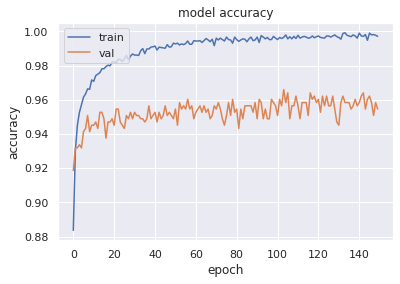

In [247]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train,  X_labels,validation_split = 0.1, epochs=150, batch_size=4)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

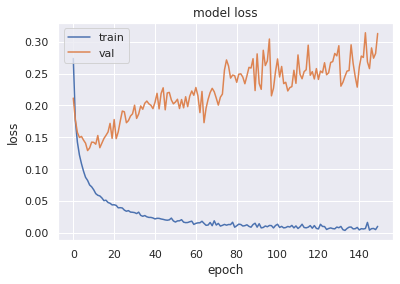

In [248]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(y_test)

In [250]:
print(len(y_pred))

1320


In [251]:
y_pred

array([[0.000000e+00],
       [0.000000e+00],
       [7.662177e-05],
       ...,
       [0.000000e+00],
       [0.000000e+00],
       [0.000000e+00]], dtype=float32)

In [0]:
for i in range(len(y_pred)):
  if(y_pred[i]>0.5):
    y_pred[i]=1
  else:
    y_pred[i]=0

In [253]:
print("prediciton accuracy:",accuracy_score(y_labels,y_pred))
print("f1_Score:",f1_score(y_labels,y_pred, average="macro"))
print("precision_score:",precision_score(y_labels,y_pred, average="macro"))
print("recall_score:",recall_score(y_labels,y_pred, average="macro"))
tneg,fpos,fneg,tpos=confusion_matrix(y_labels,y_pred).ravel()
print("tneg:{},fpos:{},fneg:{},tpos:{}".format(tneg,fpos,fneg,tpos))
Senstivity=tpos/(tpos+fneg)
print("senstivity:{}".format(Senstivity))

prediciton accuracy: 0.9636363636363636
f1_Score: 0.9315163254012175
precision_score: 0.933213536987122
recall_score: 0.9298403524562983
tneg:1088,fpos:23,fneg:25,tpos:184
senstivity:0.8803827751196173


In [254]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk
